In [26]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [27]:
#資料預處理

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images, test_images = train_images.reshape(len(train_images), 28, 28, 1), test_images.reshape(len(test_images), 28, 28, 1)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [28]:
def drawChart(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

In [29]:
model = models.Sequential([
    layers.Conv2D(16, (5,5), activation="relu", padding="same", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(36, (5,5), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax"),
])

In [30]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, batch_size=300, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 39s 652us/sample - loss: 1.6397 - accuracy: 0.8377 - val_loss: 1.5031 - val_accuracy: 0.9593
Epoch 2/5
60000/60000 [==============================] - 37s 618us/sample - loss: 1.5146 - accuracy: 0.9498 - val_loss: 1.4898 - val_accuracy: 0.9727
Epoch 3/5
60000/60000 [==============================] - 38s 633us/sample - loss: 1.5011 - accuracy: 0.9627 - val_loss: 1.4835 - val_accuracy: 0.9773
Epoch 4/5
60000/60000 [==============================] - 40s 668us/sample - loss: 1.4958 - accuracy: 0.9671 - val_loss: 1.4792 - val_accuracy: 0.9826
Epoch 5/5
60000/60000 [==============================] - 41s 685us/sample - loss: 1.4907 - accuracy: 0.9721 - val_loss: 1.4781 - val_accuracy: 0.9832


10000/10000 [==============================] - 2s 175us/sample - loss: 1.4781 - accuracy: 0.9832


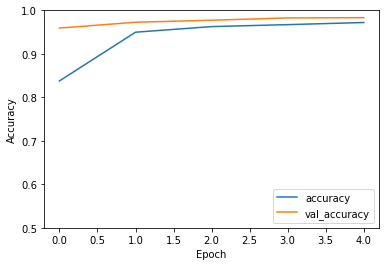

In [31]:
drawChart(history)
test_loss, test_acc = model.evaluate(test_images,  test_labels)

In [32]:
model.save('save/mnist.h5')

In [33]:
#load model and evaluate
loadModel = models.load_model('save/mnist.h5')
#loadModel.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
test_loss, test_acc = loadModel.evaluate(test_images,  test_labels)

10000/10000 [==============================] - 2s 194us/sample - loss: 1.4781 - accuracy: 0.9832
